In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("./data"))

# Any results you write to the current directory are saved as output.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

['winequality-red.csv']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree

In [4]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [5]:
data = pd.read_csv('./data/winequality-red.csv', sep=",")

In [6]:
#датасет не имеет пропущенных значений категориальных признаков
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


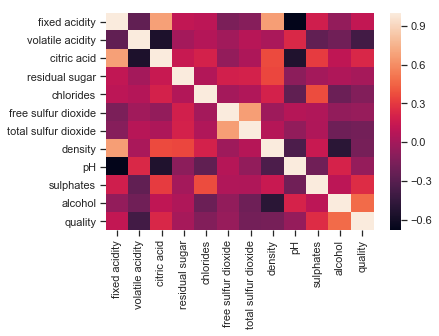

In [8]:
sns.heatmap(data.corr())

In [9]:
data = data.drop('free sulfur dioxide', axis=1)
data = data.drop('citric acid', axis=1)

In [10]:
quality = data['quality']
data = data.drop('quality', axis=1)
print(data.head())
print(quality.head())

   fixed acidity  volatile acidity  residual sugar  chlorides  \
0            7.4              0.70             1.9      0.076   
1            7.8              0.88             2.6      0.098   
2            7.8              0.76             2.3      0.092   
3           11.2              0.28             1.9      0.075   
4            7.4              0.70             1.9      0.076   

   total sulfur dioxide  density    pH  sulphates  alcohol  
0                  34.0   0.9978  3.51       0.56      9.4  
1                  67.0   0.9968  3.20       0.68      9.8  
2                  54.0   0.9970  3.26       0.65      9.8  
3                  60.0   0.9980  3.16       0.58      9.8  
4                  34.0   0.9978  3.51       0.56      9.4  
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    data, quality, test_size=0.3, random_state=1)

**Logistic regression**

In [12]:
cls_log = LogisticRegression()
cls_log.fit(x_train, y_train)
target1_0 = cls_log.predict(x_train)
target1_1 = cls_log.predict(x_test)
print('accuracy')
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy


(0.58266309204647, 0.5833333333333334)

In [13]:
#доля правильных предсказаний
recall_score(y_test, target1_1, average='macro')

0.2429425244642636

In [14]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(y_test, target1_1, average='weighted')

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5413023065366238

In [15]:
#accuracy для каждого класса
print_accuracy_score_for_classes(y_test, target1_1)

Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.7922705314009661
6 	 0.5692307692307692
7 	 0.09615384615384616
8 	 0.0


In [16]:
classification_report(y_test, target1_1, 
                      target_names=quality.unique(), output_dict=True)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{5: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 6: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 21},
 7: {'precision': 0.6119402985074627,
  'recall': 0.7922705314009661,
  'f1-score': 0.6905263157894737,
  'support': 207},
 4: {'precision': 0.5495049504950495,
  'recall': 0.5692307692307692,
  'f1-score': 0.5591939546599497,
  'support': 195},
 8: {'precision': 0.5,
  'recall': 0.09615384615384616,
  'f1-score': 0.16129032258064518,
  'support': 52},
 3: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3},
 'micro avg': {'precision': 0.5833333333333334,
  'recall': 0.5833333333333334,
  'f1-score': 0.5833333333333334,
  'support': 480},
 'macro avg': {'precision': 0.2769075415004187,
  'recall': 0.2429425244642636,
  'f1-score': 0.23516843217167807,
  'support': 480},
 'weighted avg': {'precision': 0.5413023065366238,
  'recall': 0.5833333333333334,
  'f1-score': 0.542435136044385,
  'support': 480}}

**SVC**

In [17]:
cls_svc = SVC()
cls_svc.fit(x_train, y_train)
target1_0_svc = cls_svc.predict(x_train)
target1_1_svc = cls_svc.predict(x_test)
print('accuracy')
print(accuracy_score(y_train, target1_0_svc), accuracy_score(y_test, target1_1_svc))
print('accuracy_score_for_classes')
print(print_accuracy_score_for_classes(y_test, target1_1_svc))
print('recall')
print(recall_score(y_test, target1_1_svc, average='macro'))
print('precission')
print(precision_score(y_test, target1_1_svc, average='weighted'))

accuracy
0.6872207327971404 0.5666666666666667
accuracy_score_for_classes
Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.6956521739130435
6 	 0.6205128205128205
7 	 0.1346153846153846
8 	 0.0
None
recall
0.24179672984020809
precission
0.5211866681790683


C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Decision Tree**

In [18]:
cls_dtc = tree.DecisionTreeClassifier()
cls_dtc.fit(x_train, y_train)
target1_0_dtc = cls_dtc.predict(x_train)
target1_1_dtc = cls_dtc.predict(x_test)
print('accuracy')
print(accuracy_score(y_train, target1_0_dtc), accuracy_score(y_test, target1_1_dtc))
print('accuracy_score_for_classes')
print(print_accuracy_score_for_classes(y_test, target1_1_dtc))
print('recall')
print(recall_score(y_test, target1_1_dtc, average='macro'))
print('precission')
print(precision_score(y_test, target1_1_dtc, average='weighted'))

accuracy
1.0 0.5854166666666667
accuracy_score_for_classes
Метка 	 Accuracy
3 	 0.0
4 	 0.14285714285714285
5 	 0.6859903381642513
6 	 0.558974358974359
7 	 0.5
8 	 0.3333333333333333
None
recall
0.3701925288881811
precission
0.5879908247695946


**Grid Search**

In [29]:
grid={"C":np.logspace(2,5,10), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(cls_log,grid,cv=5)
logreg_cv.fit(x_train,y_train)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' i

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([   100.     ,    215.44347,    464.15888,   1000.     ,
         2154.43469,   4641.58883,  10000.     ,  21544.3469 ,
        46415.88834, 100000.     ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
logreg_cv.best_estimator_

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [26]:
logreg_cv.best_score_

0.5781948168007149

In [27]:
cls_best_log = logreg_cv.best_estimator_.fit(x_train,y_train)
target1_0_blog = cls_best_log.predict(x_train)
target1_1_blog = cls_best_log.predict(x_test)
print('accuracy')
print(accuracy_score(y_train, target1_0_blog), accuracy_score(y_test, target1_1_blog))
print('accuracy_score_for_classes')
print(print_accuracy_score_for_classes(y_test, target1_1_blog))
print('recall')
print(recall_score(y_test, target1_1_blog, average='macro'))
print('precission')
print(precision_score(y_test, target1_1_blog, average='weighted'))

accuracy
0.5987488829311886 0.5854166666666667
accuracy_score_for_classes
Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.8067632850241546
6 	 0.5282051282051282
7 	 0.21153846153846154
8 	 0.0
None
recall
0.25775114579462405
precission
0.5403607596834152


C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
tuned_parameters = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
svc_cv=GridSearchCV(cls_svc,tuned_parameters,cv=5)
svc_cv.fit(x_train,y_train)

C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': (10, 20, 1)}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn', scoring=None, verbose=0)

In [30]:
print(svc_cv.best_estimator_)
cls_best_svc = svc_cv.best_estimator_.fit(x_train,y_train)
target1_0_bsvc = cls_best_svc.predict(x_train)
target1_1_bsvc = cls_best_svc.predict(x_test)
print('accuracy')
print(accuracy_score(y_train, target1_0_bsvc), accuracy_score(y_test, target1_1_bsvc))
print('accuracy_score_for_classes')
print(print_accuracy_score_for_classes(y_test, target1_1_bsvc))
print('recall')
print(recall_score(y_test, target1_1_bsvc, average='macro'))
print('precission')
print(precision_score(y_test, target1_1_bsvc, average='weighted'))

SVC(C=17, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
accuracy
0.8552278820375335 0.5458333333333333
accuracy_score_for_classes
Метка 	 Accuracy
3 	 0.0
4 	 0.09523809523809523
5 	 0.6908212560386473
6 	 0.5230769230769231
7 	 0.2692307692307692
8 	 0.3333333333333333
None
recall


C:\Users\pisar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.31861672948629466
precission
0.5324088201468471


In [8]:
print("SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,\n decision_function_shape='ovr', degree=3, gamma=0.1,\n kernel='rbf', max_iter=-1, probability=False, random_state=None,\n shrinking=True, tol=0.001, verbose=False)")
print("Accuracy train = 0.969230")
print("Accuracy test = 0.895238")

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
 decision_function_shape='ovr', degree=3, gamma=0.1,
 kernel='rbf', max_iter=-1, probability=False, random_state=None,
 shrinking=True, tol=0.001, verbose=False)
Accuracy train = 0.969230
Accuracy test = 0.895238


In [19]:
tuned_parameters = {'max_depth': np.arange(3, 15)}
dtc_cv=GridSearchCV(cls_dtc,tuned_parameters,cv=5)
dtc_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
print(dtc_cv.best_estimator_)
cls_best_dtc = dtc_cv.best_estimator_.fit(x_train,y_train)
target1_0_bdtc = cls_best_dtc.predict(x_train)
target1_1_bdtc = cls_best_dtc.predict(x_test)
print('accuracy')
print(accuracy_score(y_train, target1_0_bdtc), accuracy_score(y_test, target1_1_bdtc))
print('accuracy_score_for_classes')
print(print_accuracy_score_for_classes(y_test, target1_1_bdtc))
print('recall')
print(recall_score(y_test, target1_1_bdtc, average='macro'))
print('precission')
print(precision_score(y_test, target1_1_bdtc, average='weighted'))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy
0.8239499553172476 0.5833333333333334
accuracy_score_for_classes
Метка 	 Accuracy
3 	 0.0
4 	 0.0
5 	 0.7294685990338164
6 	 0.5282051282051282
7 	 0.5
8 	 0.0
None
recall
0.29294562120649076
precission
0.5695996780497016


**Сравнение accuracy до и после grid search**

Logistic regression

0.58266309204647, 0.5833333333333334

0.5987488829311886 0.5854166666666667

SVC

0.6872207327971404 0.5666666666666667

0.8552278820375335 0.5458333333333333

Decision Tree

1.0 0.5854166666666667

0.8239499553172476 0.5833333333333334
